1. Sales Forecasting for a Retail Store 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder


In [4]:
data_sales = pd.read_csv("D:/Japanese/Sales_data.csv") 

X_sales = data_sales[['ad_budget', 'discount_rate', 'season','store_traffic']]
y_sales = data_sales['sales']

encoder = OneHotEncoder(sparse_output=False)
season_encoded = encoder.fit_transform(data_sales[['season']])
season_df = pd.DataFrame(season_encoded, columns=encoder.get_feature_names_out(['season']))


data_sales_encoded = data_sales.drop('season', axis=1)
data_sales_encoded = pd.concat([data_sales_encoded, season_df], axis=1)

# Separate features and target
X_sales = data_sales_encoded.drop('sales', axis=1)  
y_sales = data_sales_encoded['sales']

X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X_sales, y_sales, test_size=0.2, random_state=42)
model_sales = LinearRegression()

model_sales.fit(X_train_sales, y_train_sales)
y_pred_sales = model_sales.predict(X_test_sales)

mse_sales = mean_squared_error(y_test_sales, y_pred_sales)
r2_sales = r2_score(y_test_sales, y_pred_sales)

print(f"Sales Forecast - MSE: {mse_sales}")
print(f"Sales Forecast - R-squared: {r2_sales}")

Sales Forecast - MSE: 1879652.8602796355
Sales Forecast - R-squared: 0.9969347933063024


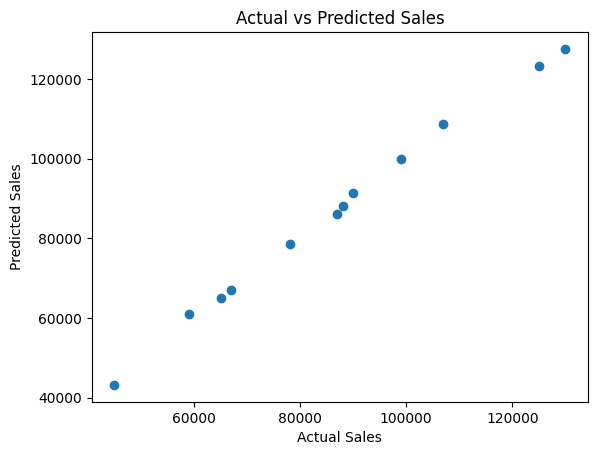

In [5]:
plt.scatter(y_test_sales, y_pred_sales)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

2. Email Spam Detection using SVM

In [13]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Load dataset only required cols
df = pd.read_csv("D:/Japanese/SMS-Spam_data.csv", encoding='latin-1', usecols=[0, 1], names=["label", "message"], skiprows=1)

df.columns = ["label", "message"]
# Convert labels to binary (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:
# Text Preprocessing
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
corpus = []
for msg in df['message']:
    msg = re.sub('[^a-zA-Z]', ' ', msg).lower().split()
    msg = [ps.stem(word) for word in msg if word not in stopwords.words('english')]
    corpus.append(" ".join(msg))
    
# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus).toarray()
y = df['label'].values

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.979372197309417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



3. Customer Churn Prediction using SVM 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [6]:

df = pd.read_csv("D:/Japanese/customer_dataset.csv")

df = df.drop(columns=['CustomerID'])
df= df.dropna()
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    encoders[col] = LabelEncoder()
    X_train_processed[col] = encoders[col].fit_transform(X_train[col])
    X_test_processed[col] = encoders[col].transform(X_test[col])


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)


In [7]:
from sklearn.decomposition import PCA

# Apply PCA 
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_pca, y_train, train_size=50000, random_state=42)


svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_sample, y_train_sample)

# Evaluate
y_pred = svm_model.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9737770367597854
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     38063
         1.0       1.00      0.96      0.98     50104

    accuracy                           0.97     88167
   macro avg       0.97      0.98      0.97     88167
weighted avg       0.97      0.97      0.97     88167



4. Fraud Detection in Credit Card Transactions

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [9]:
# Download through "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df =pd.read_csv("D:/Japanese/creditcard.csv")

df = df.sample(frac=0.1, random_state=42)

X = df.drop(columns=['Class'])
y = df['Class']

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9989468141126909
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.00      0.00      0.00         6

    accuracy                           1.00      5697
   macro avg       0.50      0.50      0.50      5697
weighted avg       1.00      1.00      1.00      5697



c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.